### TWEET EMOTION RECOGNITION: NLP WITH TENSORFLOW
---

### Libraries

In [28]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random

### Functions

In [13]:
from src.functions.show import show_history, show_confusion_matrix
from src.functions.tweet import get_tweet, get_sequences

### Import data

In [14]:
dataset = nlp.load_dataset("emotion") #install data

Using custom data configuration default


In [15]:
dataset

{'train': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 16000),
 'validation': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000),
 'test': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000)}

### Split dataset

In [16]:
train = dataset["train"]
val = dataset["validation"]
test = dataset["test"]

In [17]:
print("Number of examples in train: {0}".format(len(train)))
print("Number of examples in validation: {0}".format(len(val)))
print("Number of examples in test: {0}".format(len(test)))

Number of examples in train: 16000
Number of examples in validation: 2000
Number of examples in test: 2000


###

### Tweets

In [18]:
tweets, labels = get_tweet(train)
print("Tweet: {0}\nLabel: {1}".format(tweets[0], labels[0]))

Tweet: i didnt feel humiliated
Label: sadness


### Tokenizer


In [20]:
# uses the tokenizer for the most common 10.000 words
# if an word isn't present on the most common, the corresponding token is <UNK>
tokenizer = Tokenizer(num_words=10000, oov_token="<UNK>")
tokenizer.fit_on_texts(tweets)

In [23]:
example_token = tokenizer.texts_to_sequences([tweets[0]])
print("Tweet: {0}\nToken: {1}".format(tweets[0], example_token))

Tweet: i didnt feel humiliated
Token: [[2, 139, 3, 679]]


### Padding and truncating sequences

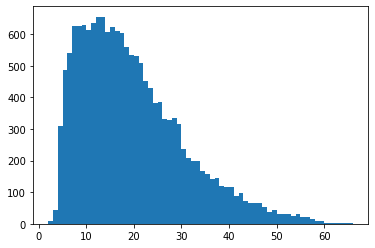

In [27]:
lengths = [len(t.split(' ')) for t in tweets]
plt.hist(lengths, bins=(len(set(lengths))))
plt.show()